# Table of Contents
### 1. Image Data

### 2. CNN 모델링
  * Filter Size
  * Kernel 초기화
  * 배치 정규화
  * Activation Function
  
### 3. Optimizer

### 4. Training
  * Cost Function
  * Mini Batch Training
  * Callbacks
  * Batch Generator & Real-time Data Augmentation
  * Regularization
  
### 5. Optimization
  * Best Model vs. Ensemble
  * OpenCV
  * Advanced Data Augmentation
  
### 6. Final Kaggle Submission

# 1. Image Data (Input)
  * 15 Facial Keypoints to Detect
  * Two Diffrent Dataset
    * 4 Keypoints
    * 11 Keypoints

# 2. CNN  모델링

<img src="cnn_model.png" width=300 />

* ### Filter Size
  * 3 vs 5

* ### Kernel 초기화
  * He Normal
    * $ \text{Truncated Normal}(0, \sqrt{\text{# of input units}}) $

* ### 배치 정규화 (Batch Normalization)

* ### Activation Function
  * ReLU
  * Tanh

# 3. Optimizer (학습방법)

* Stochastic Gradient Descent
$$
\theta \leftarrow \theta - \eta \nabla_{\theta}J(\theta)
$$

* Adagrad
$$
G_t \leftarrow G_{t-1} + (\nabla_{\theta}J(\theta_t))^2
$$

$$
\theta_{t+1} \leftarrow \theta_t - \frac{\eta}{\sqrt{G_t+\epsilon}}\cdot \nabla_{\theta}J(\theta_t)
$$

* <strong>RMSProp</strong>
$$
G \leftarrow \gamma{G} + (1-\gamma)(\nabla_{\theta}J(\theta_t))^2
$$

$$
\theta_{t+1} \leftarrow \theta_t - \frac{\eta}{\sqrt{G_t+\epsilon}}\cdot \nabla_{\theta}J(\theta_t)
$$

```python
from keras.optimizers import RMSprop
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-8, decay=0)
```

# 4. Training

### Cost Function
  * Mean Squared Error
  * Root Mean Squared Error
  
```python
import keras.backend as K
def rmse(target, y_predicted):
    rmse = K.sqrt(K.mean(K.square(y_predicted - target))) * 48
    return rmse
```

### Mini-Batch Training
  * Dataset 1
    * N = 7000
    * Batch Size = 256
  * Dataset 2
    * N = 2155
    * Batch Size = 128

### Callbacks
  * ModelCheckpoint
    * 매 Epoch마다 트레인 된 weight 값들을 저장
  * EarlyStopping
    * MSE를 모니터링
    * 마지막 50 Epochs동안 퍼포먼스 향상이 없다면 스탑

### Batch Generator & Real-time Data Augmentation
  * 매 배치마다 이미지 데이터를 새롭게 증강 시킨다.
  * 장단점
    * 무한한 방법으로 변환 가능한 이미지 데이터
    * 매배치다가 이미지들를 변환 시켜서 트레이닝이 느려짐

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
from K.utils.load import load_train_data_and_split
from K.utils.data_augment_generator import DataAugmentGenerator

COLS = [
    'left_eye_inner_corner_x',      'left_eye_inner_corner_y',
    'left_eye_outer_corner_x',      'left_eye_outer_corner_y',
    'right_eye_inner_corner_x',     'right_eye_inner_corner_y',
    'right_eye_outer_corner_x',     'right_eye_outer_corner_y',
    'left_eyebrow_inner_end_x',     'left_eyebrow_inner_end_y',
    'left_eyebrow_outer_end_x',     'left_eyebrow_outer_end_y',
    'right_eyebrow_inner_end_x',    'right_eyebrow_inner_end_y',
    'right_eyebrow_outer_end_x',    'right_eyebrow_outer_end_y',
    'mouth_left_corner_x',          'mouth_left_corner_y',
    'mouth_right_corner_x',         'mouth_right_corner_y',
    'mouth_center_top_lip_x',       'mouth_center_top_lip_y',
    'Image'
]
FLIP_INDICES = [(0, 4), (1, 5), (2, 6), (3, 7), (8, 12), (9, 13), (10, 14), (11, 15), (16, 18), (17, 19)]

def plot_data(img, landmarks, axis):
    axis.imshow(np.squeeze(img), cmap='gray')
    landmarks = landmarks * 48 + 48
    axis.scatter(landmarks[0::2], landmarks[1::2], marker='o', c='r', s=20)

/Users/sanghapark/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
X_train, _, Y_train, _ = load_train_data_and_split("data/training.csv", COLS, 0.1)

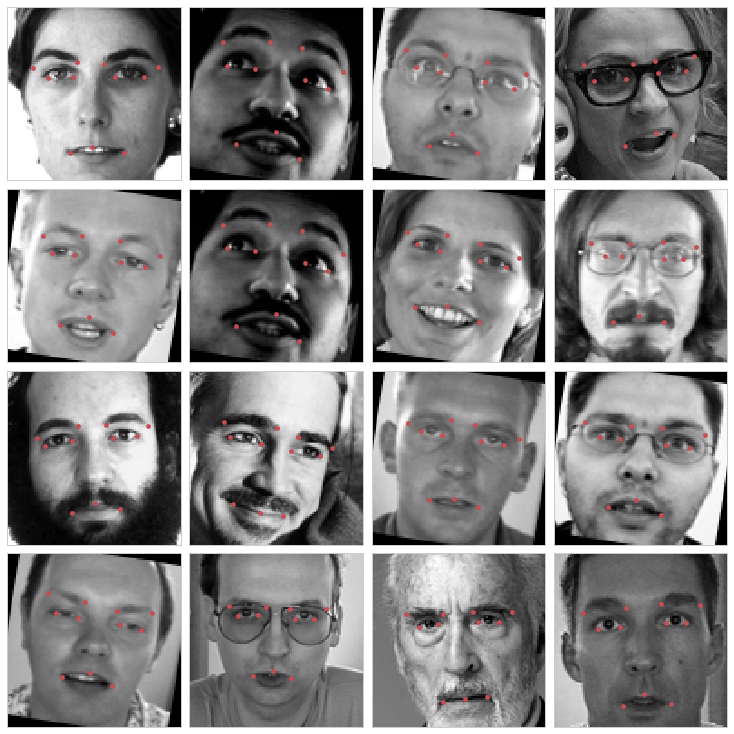

In [3]:
generator = DataAugmentGenerator(X_train,
                                 Y_train,
                                 batchsize=100,
                                 flip_indices=FLIP_INDICES,
                                 flip_ratio=0.5,
                                 rotate_ratio=0.5,
                                 contrast_ratio=0.5,
                                 perspective_transform_ratio=0.5,
                                 elastic_transform_ratio=0.5)
batch = generator.generate(batchsize=100, flip=True, rotate=True, contrast=True, perspective_transform=False, elastic_transform=False)
for X, Y in batch:
    fig = plt.figure(figsize=(10,10))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(16):
        rnd_idx = random.randint(0, 99)
        ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
        plot_data(X[rnd_idx, :, :, 0], Y[rnd_idx], ax)
    break

### Regularization
  * L1 & L2
  * Dropout
  * <strong>No Regularizations!</strong>

# 5. Optimization

## Ensemble vs. Best Model vs. Selected Ensemble

Using TensorFlow backend.
/Users/sanghapark/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


### Ensemble

In [5]:
model_name = 'model_20171117_1723'
X_test = load_test_data('./data/test.csv')

In [6]:
model = load_models_with_weights(model_name)
predicted = predict(X_test, model)
submission = create_submission(predicted)
datetime = dt.datetime.now().strftime("%Y%m%d_%H%M")
filename = 'submission_' + datetime + '.csv'
submission.to_csv(filename, index_label='RowId')

* Score (RMSE) of submission_20171120_0110.csv
  * public:  <strong>2.57497</strong>
  * private: <strong>2.52040</strong>

### Best CNN Model

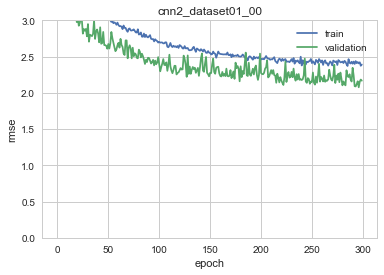

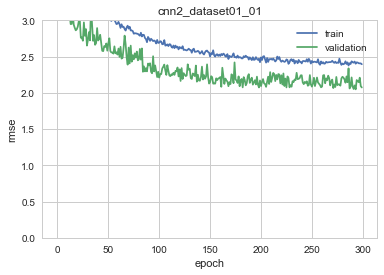

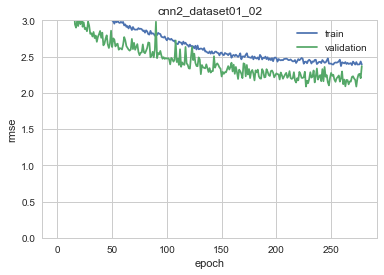

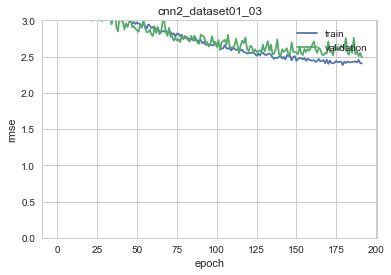

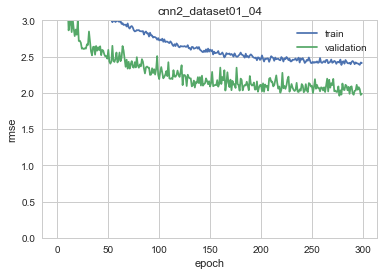

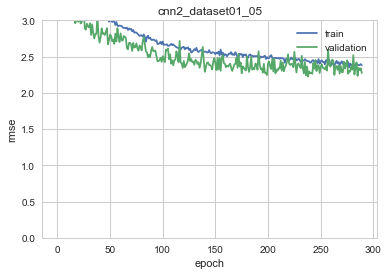

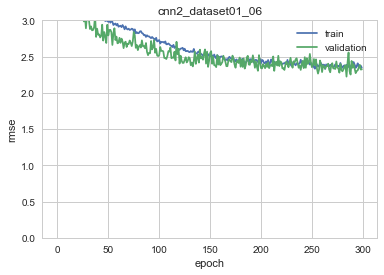

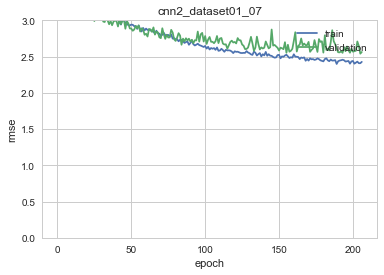

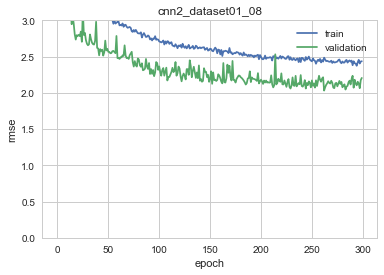

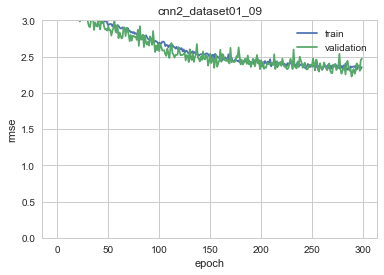

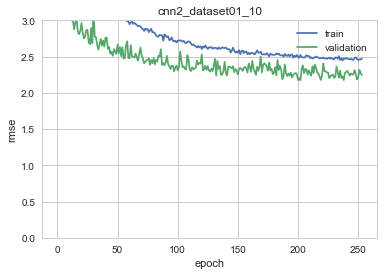

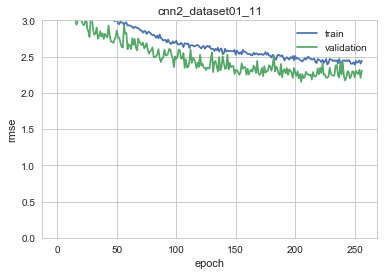

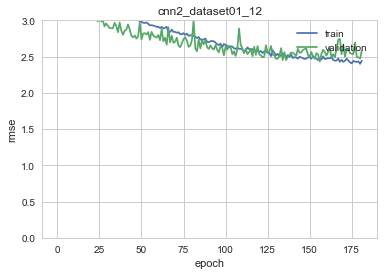

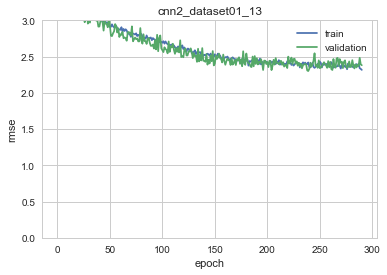

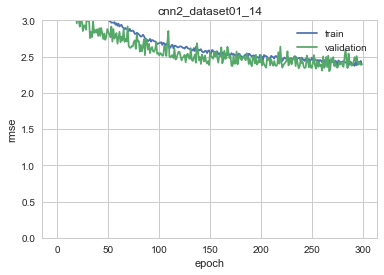

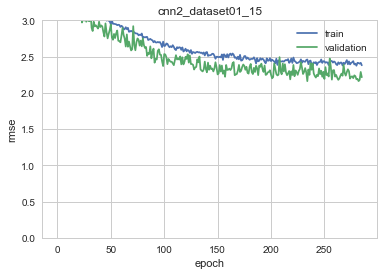

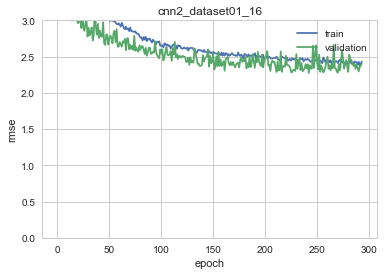

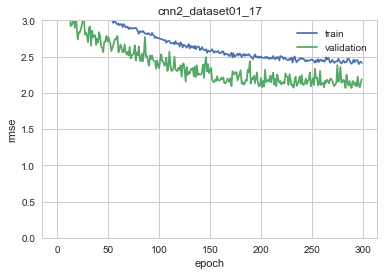

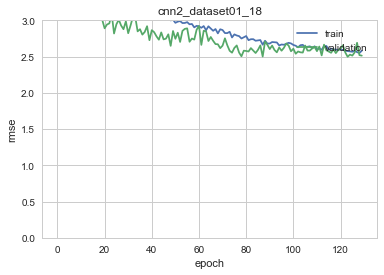

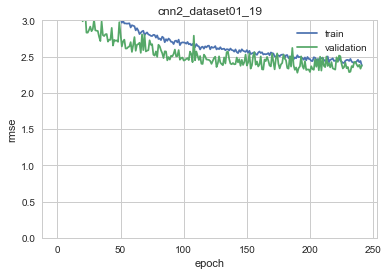

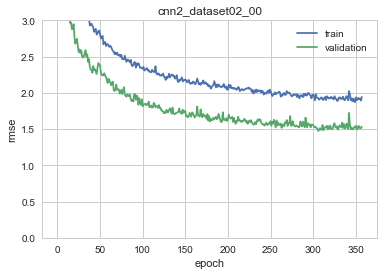

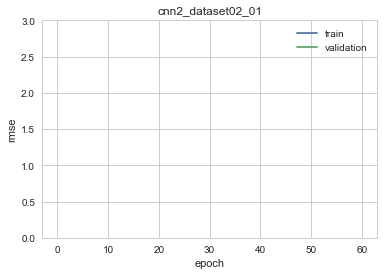

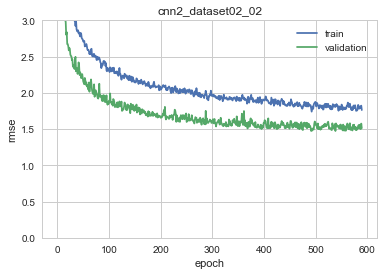

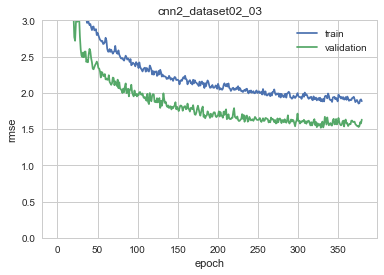

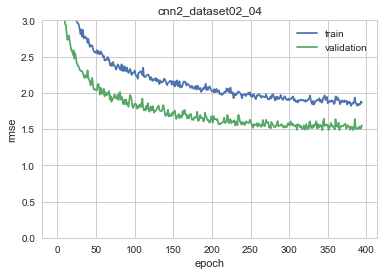

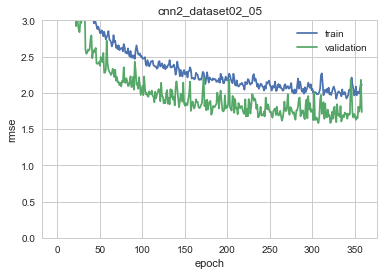

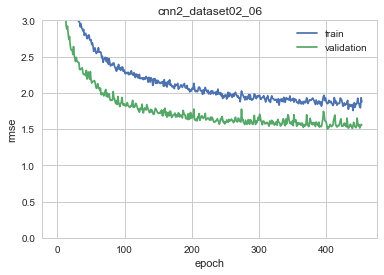

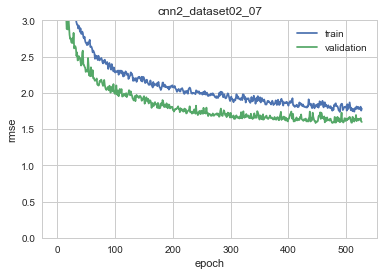

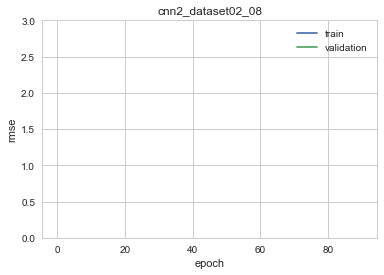

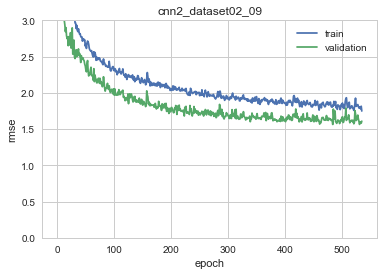

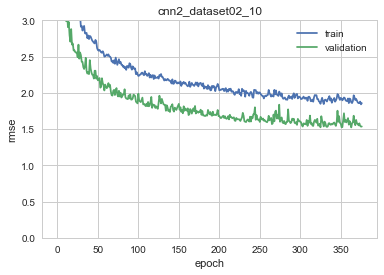

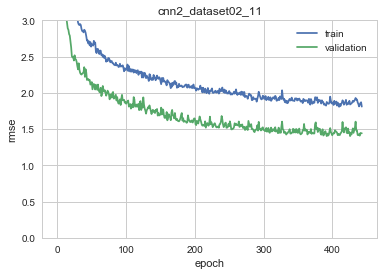

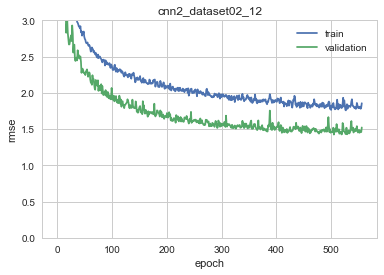

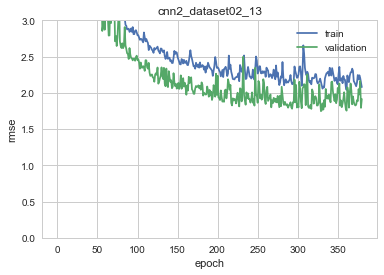

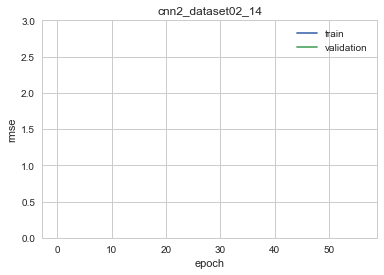

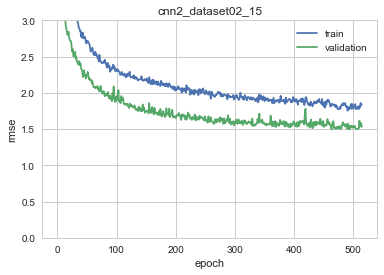

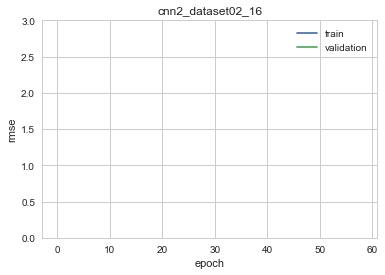

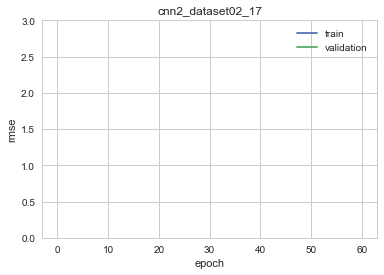

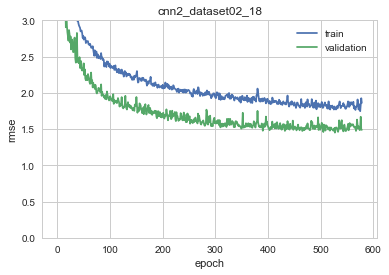

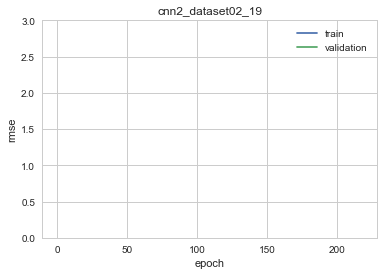

In [7]:
plot_loss_history(model_name, 'cnn2_dataset01', 20)
plot_loss_history(model_name, 'cnn2_dataset02', 20)

In [9]:
best_cnns = pick_cnns(model, [4], [25])
predicted = predict(X_test, best_cnns)
submission = create_submission(predicted)
datetime = dt.datetime.now().strftime("%Y%m%d_%H%M")
filename = 'submission_' + datetime + '.csv'
submission.to_csv(filename, index_label='RowId')

* Score (RMSE) of submission_20171120_0116.csv
  * public:  <strong>2.25358</strong>
  * private: <strong>2.02075</strong>

### Selected Ensemble

In [10]:
indexes08 = [0, 1, 2, 4, 5, 6, 8, 9, 10, 11, 13, 14, 15, 16, 17, 19] 
indexes22 = [0, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 15, 18, 21, 22, 25, 27, 29]
selected_ensemble = pick_cnns(model, indexes08, indexes22)
predicted = predict(X_test, selected_ensemble)
submission = create_submission(predicted)
datetime = dt.datetime.now().strftime("%Y%m%d_%H%M")
filename = 'submission_' + datetime + '.csv'
submission.to_csv(filename, index_label='RowId')

* Score (RMSE) of submission_20171120_0132.csv
  * public:  <strong>2.14311</strong>
  * private: <strong>1.92491</strong>

베스트모델 하나보다 성능 좋은 여러개의 모델들의 앙상블모델이 더 좋은 성능을 보여준다.

## OpenCV
  * OpenCV2로 얼굴을 인식하여 Face Bounding Box를 찾고 그 안에서 예측해보자.

216


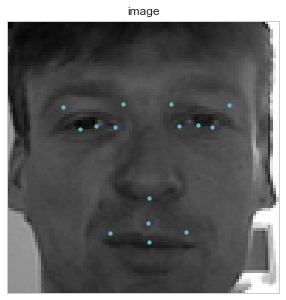

In [27]:
import random
# idx = random.randint(0, len(X_test))
idx=216
print(idx)

img = to_img(X_test[idx].reshape(-1)*255)

cv2_img = np.array(img)[:, :, ::-1].copy()
cv2_img = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2GRAY)
image_with_detections = np.copy(cv2_img)
    
fig = plt.figure(figsize = (5,5))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('image')    

landmarks = predict_with_cv2(np.array([X_test[idx]]), selected_ensemble)
ax1.scatter(landmarks[0, 0::2], landmarks[0, 1::2], marker='o', c='c', s=15)
ax1.imshow(image_with_detections, cmap='gray')

In [12]:
predicted = predict_with_cv2(X_test, selected_ensemble)
submission = create_submission(predicted)
datetime = dt.datetime.now().strftime("%Y%m%d_%H%M")
filename = 'submission_' + datetime + '.csv'
submission.to_csv(filename, index_label='RowId')

* score (RMSE): submission_20171120_1719.csv
  * public:  <strong>2.83592</strong>
  * private: <strong>2.51648</strong>
* False Positive가 잦은 이유 때문

## Advanced Augmentation
  * Elastic Transformation
  * Perspective Transformation

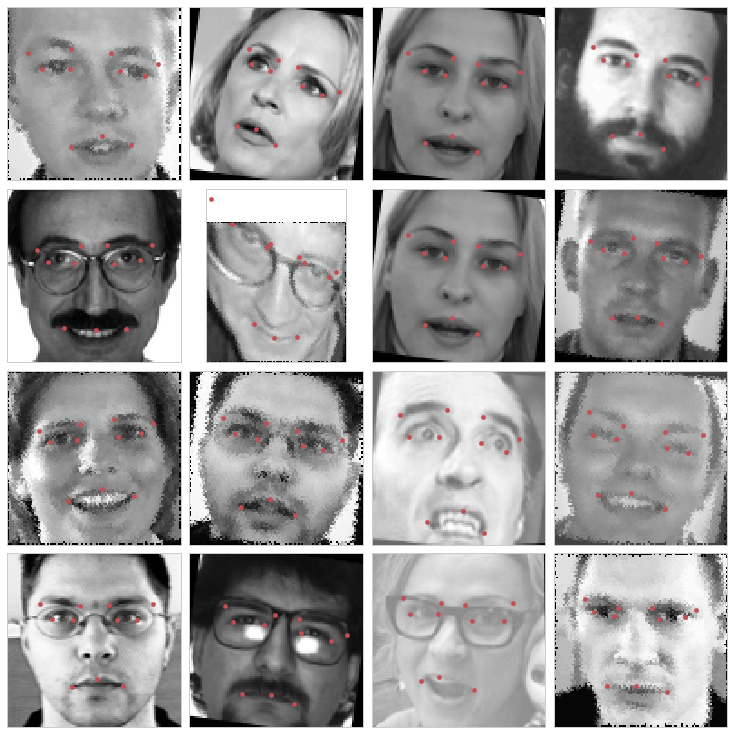

In [14]:
batch = generator.generate(batchsize=100, flip=True, rotate=True, contrast=True, perspective_transform=True, elastic_transform=True)
for X, Y in batch:
    fig = plt.figure(figsize=(10,10))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(16):
        rnd_idx = random.randint(0, 99)
        ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
        plot_data(X[rnd_idx, :, :, 0], Y[rnd_idx], ax)
    break

In [28]:
final_model_name = 'final_model'
final_model = load_models_with_weights(final_model_name)

In [30]:
len(final_model[0]), len(final_model[1])

(61, 53)

성능 좋은 CNN 모델들을 선택해서 앙상블 모델을 구성해보자.

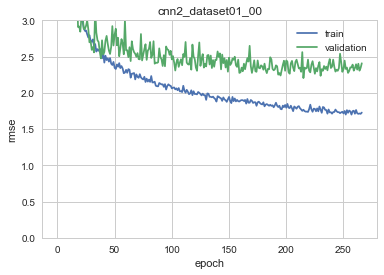

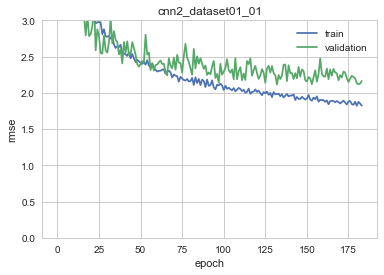

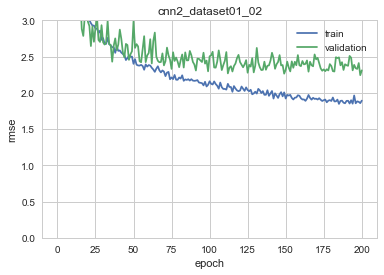

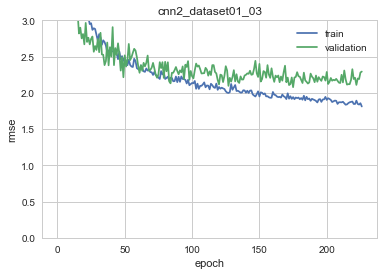

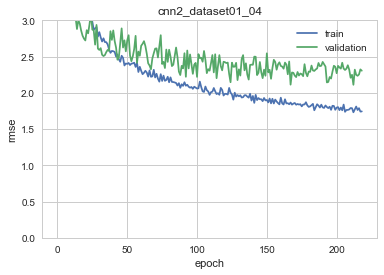

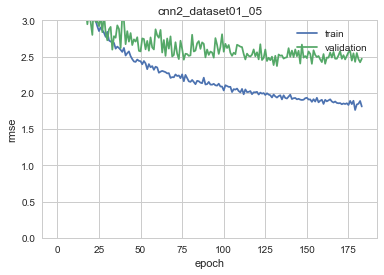

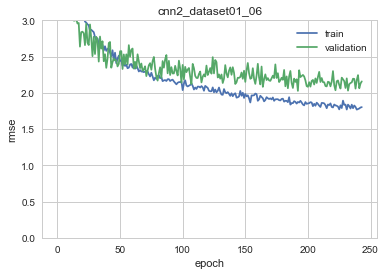

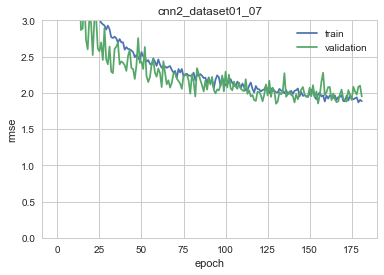

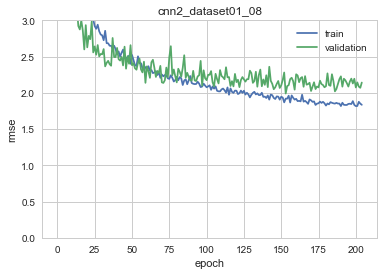

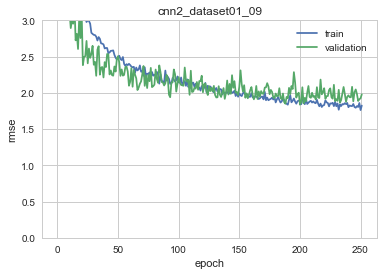

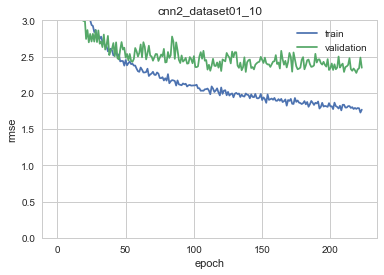

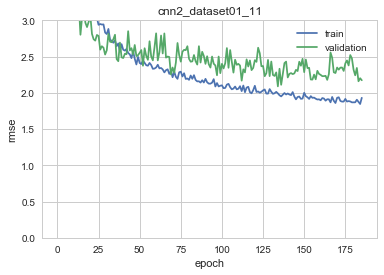

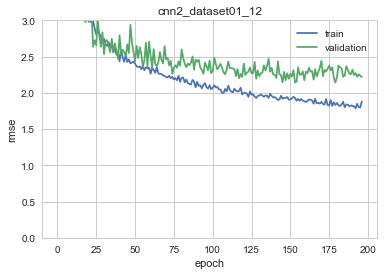

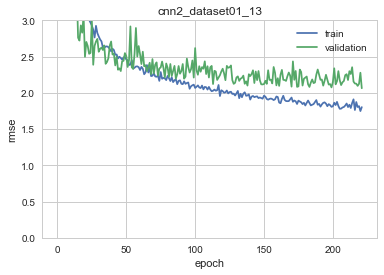

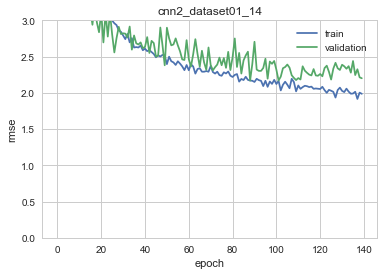

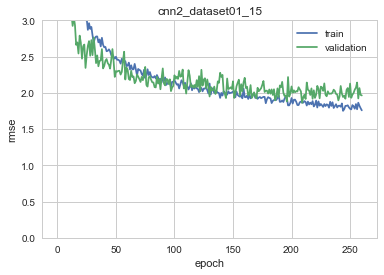

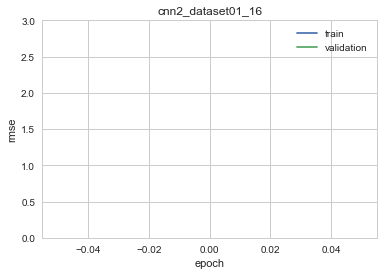

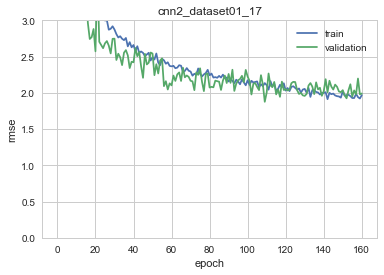

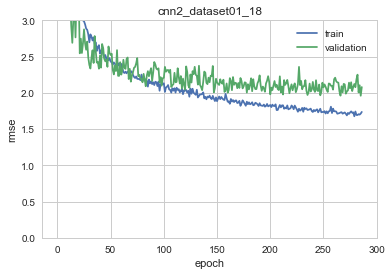

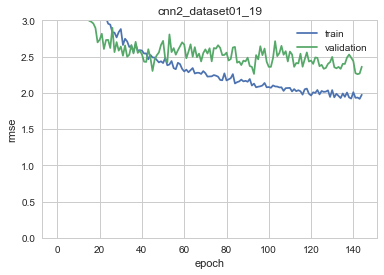

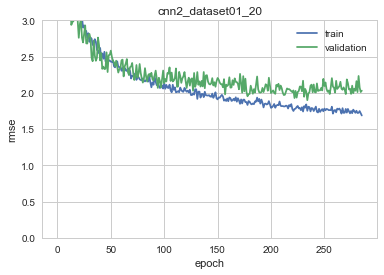

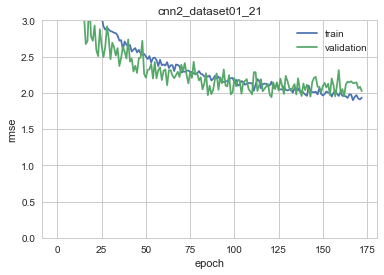

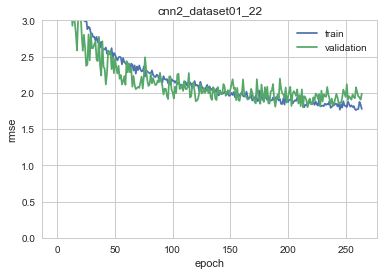

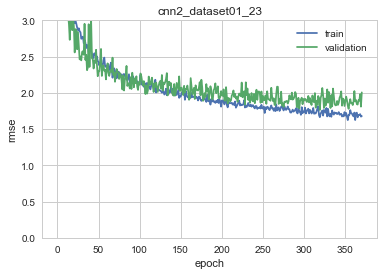

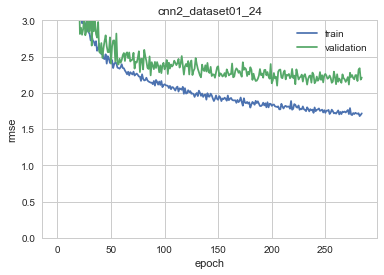

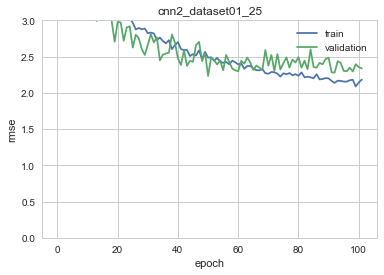

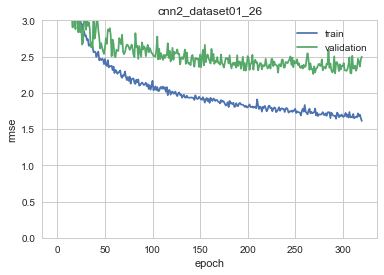

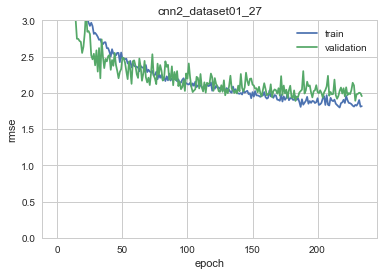

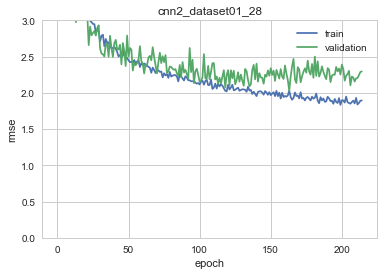

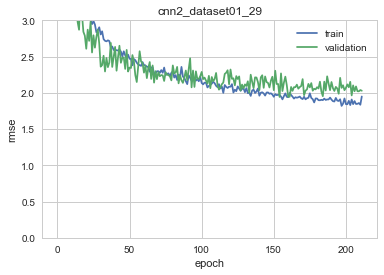

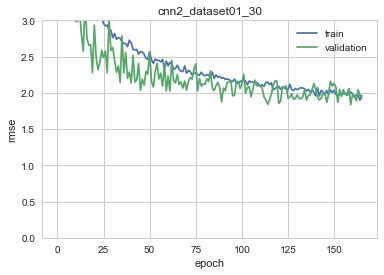

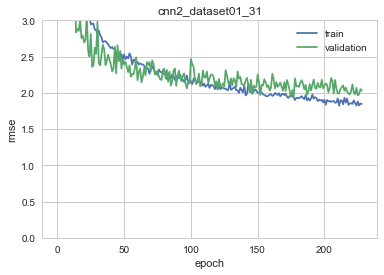

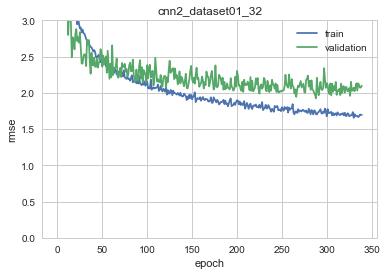

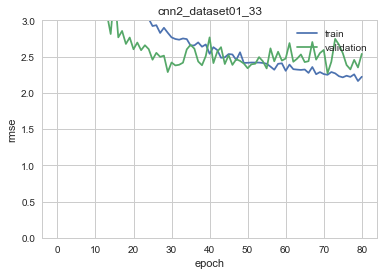

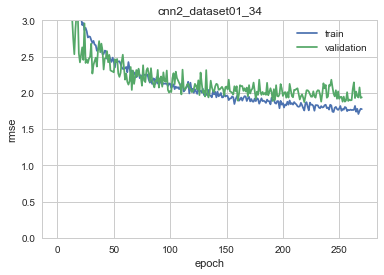

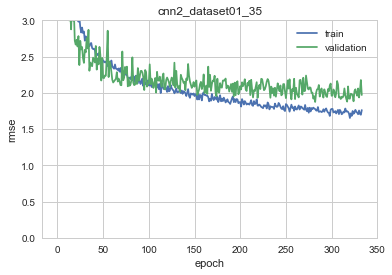

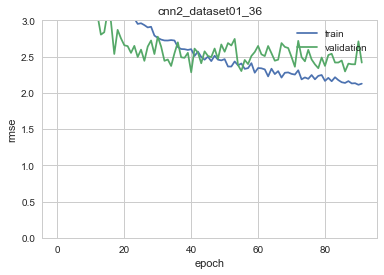

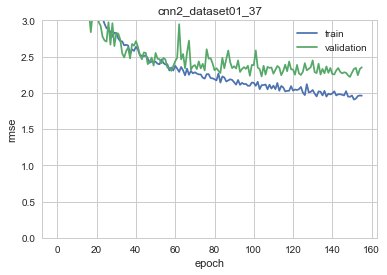

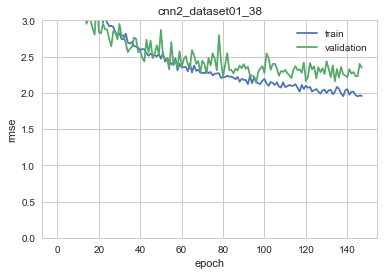

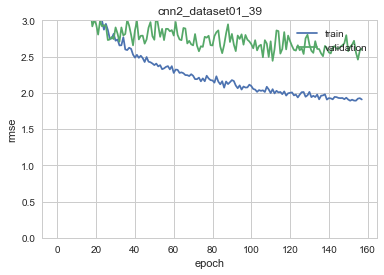

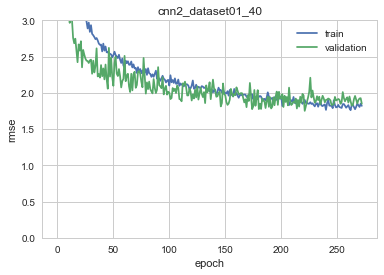

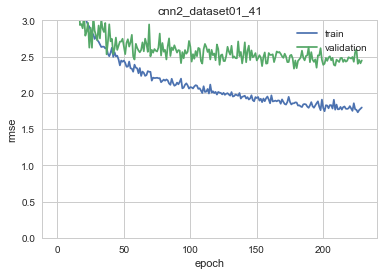

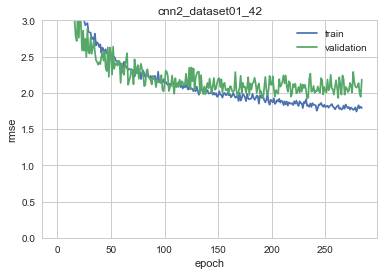

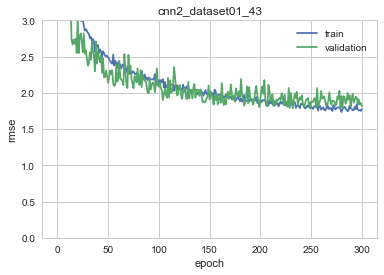

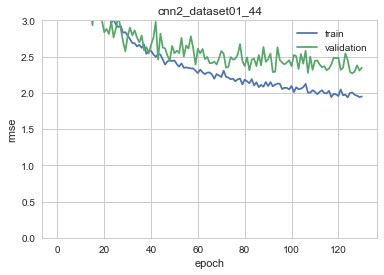

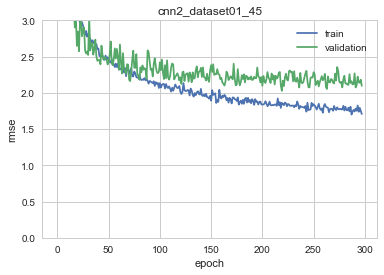

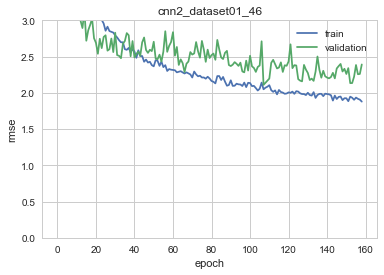

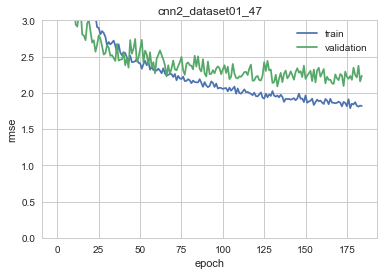

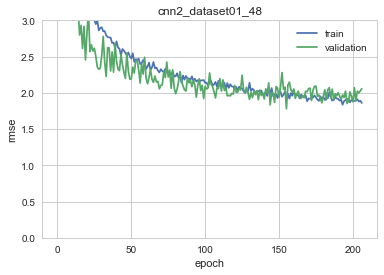

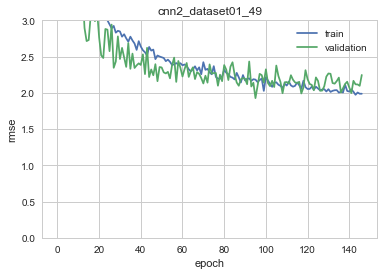

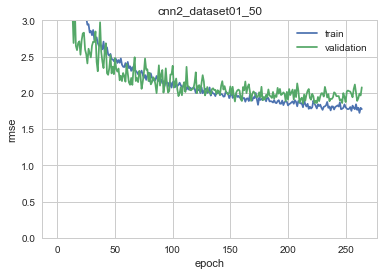

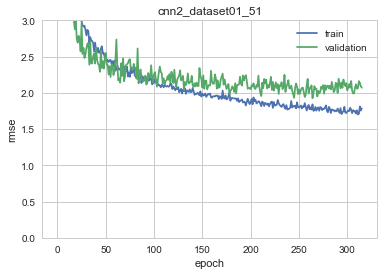

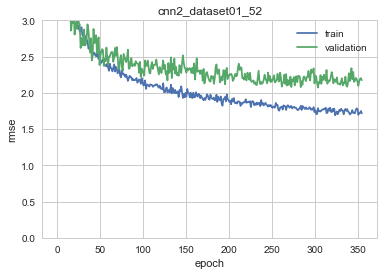

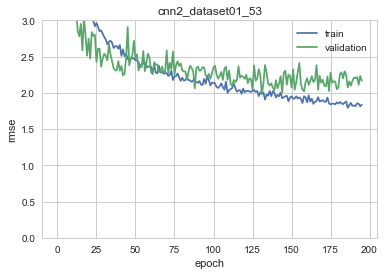

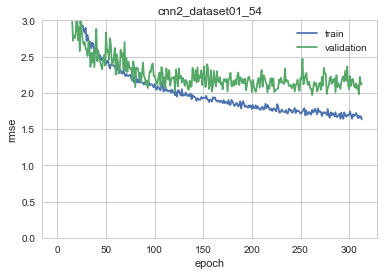

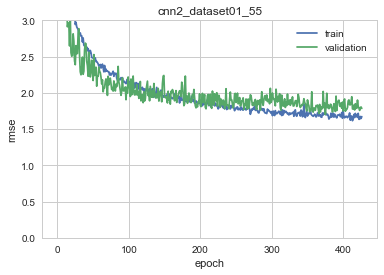

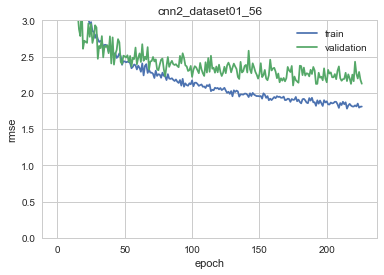

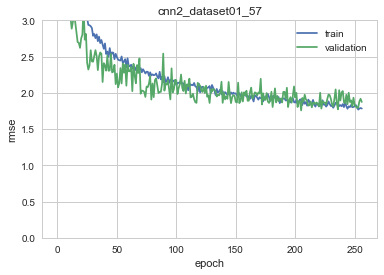

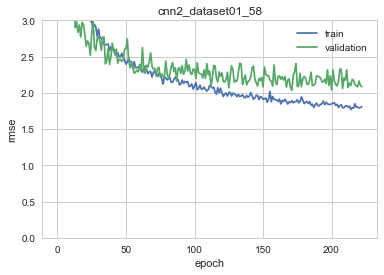

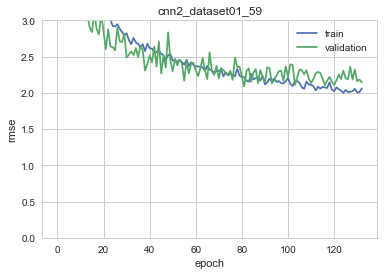

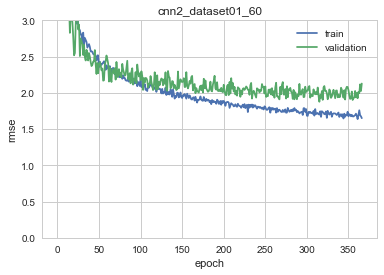

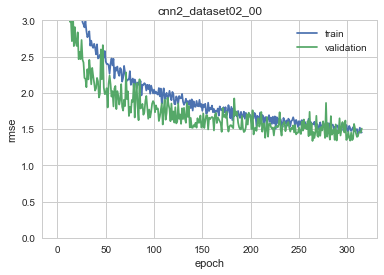

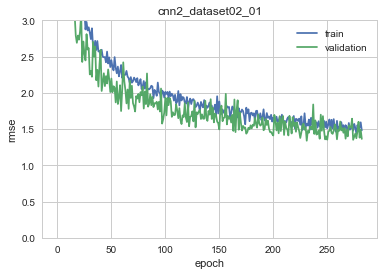

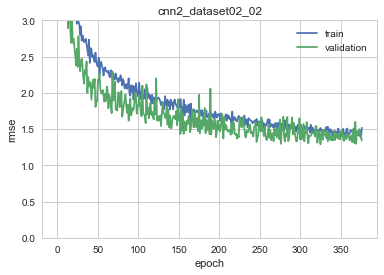

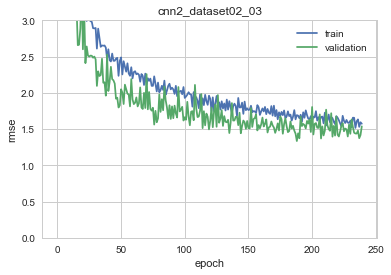

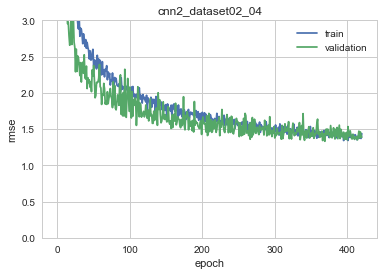

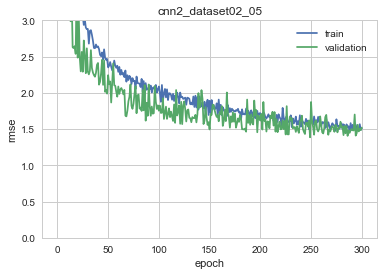

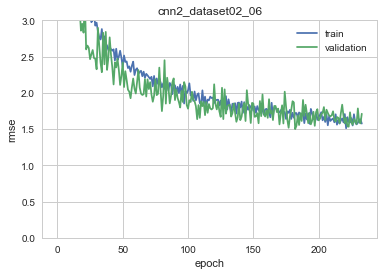

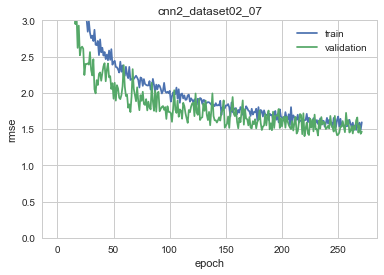

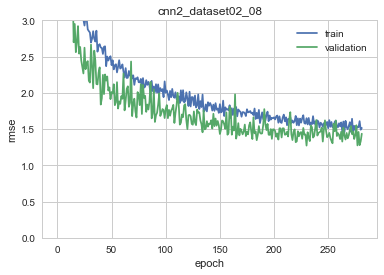

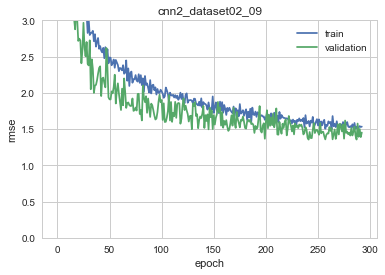

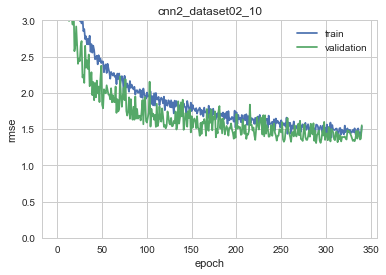

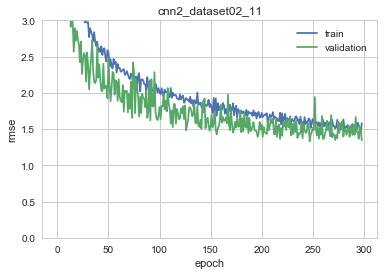

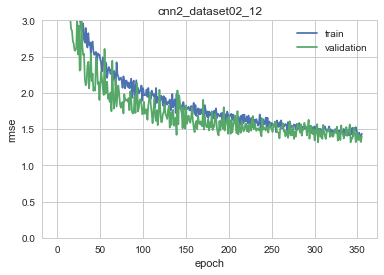

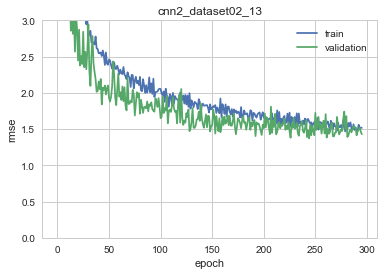

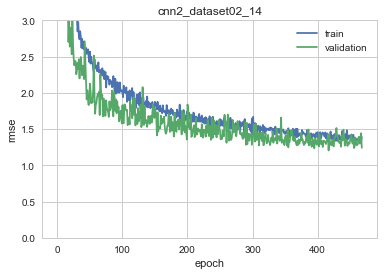

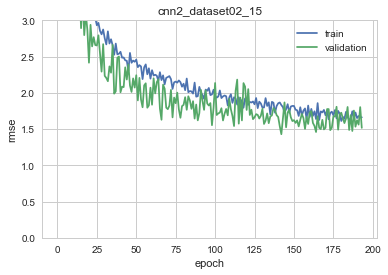

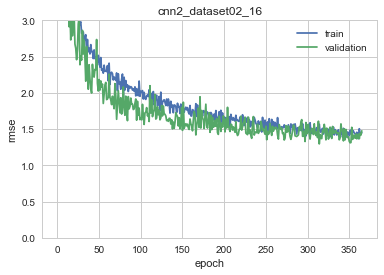

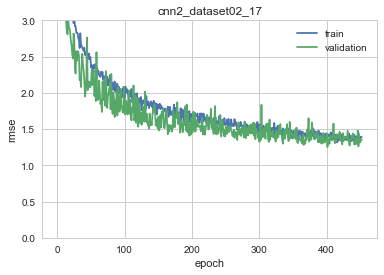

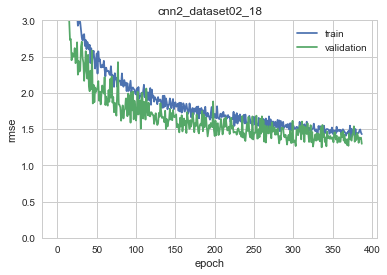

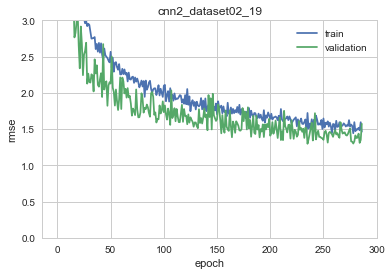

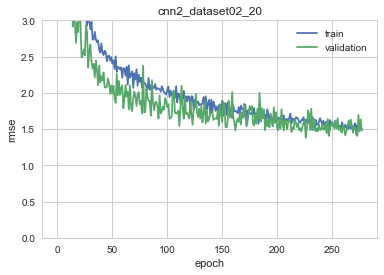

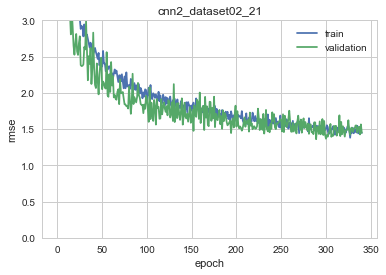

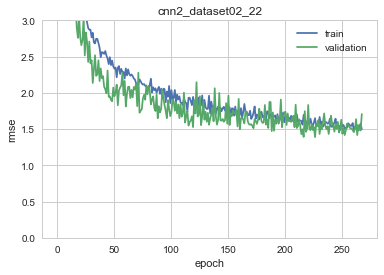

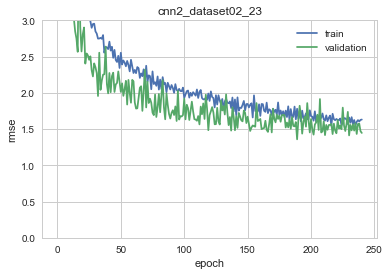

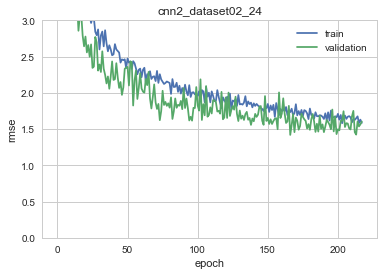

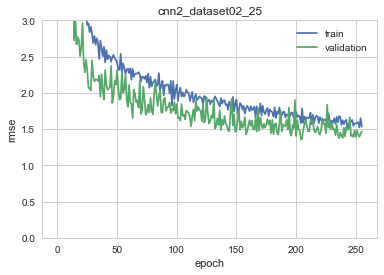

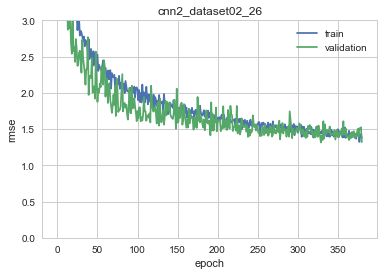

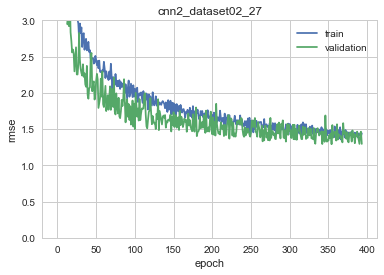

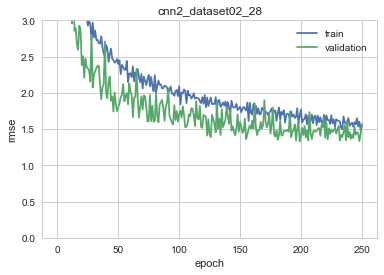

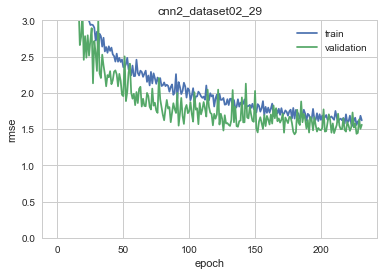

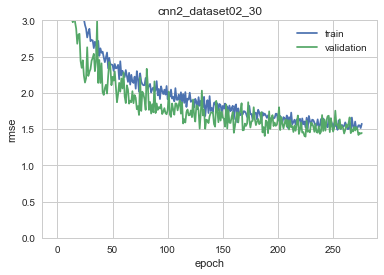

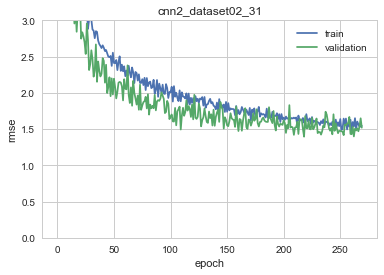

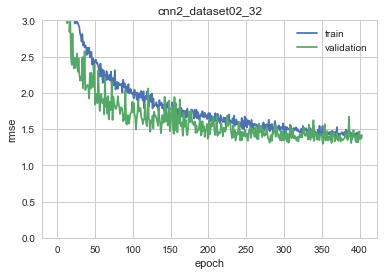

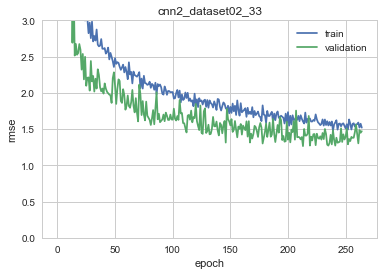

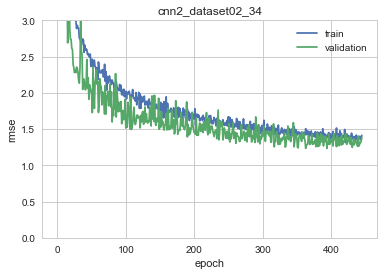

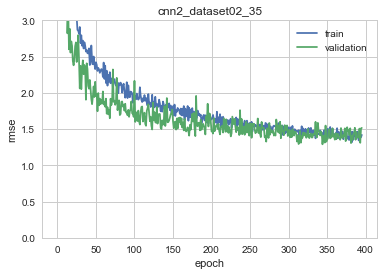

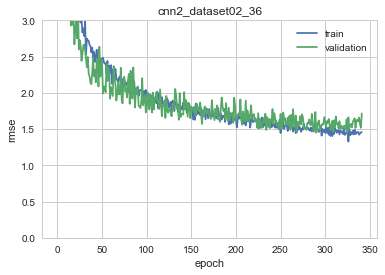

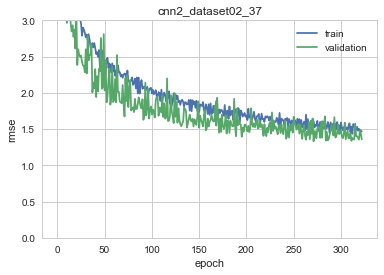

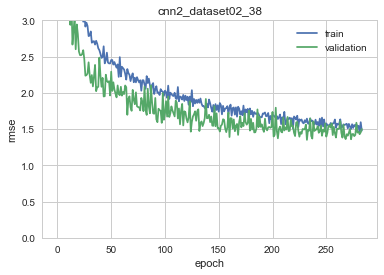

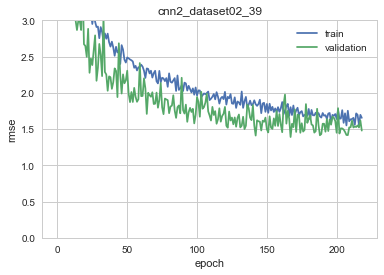

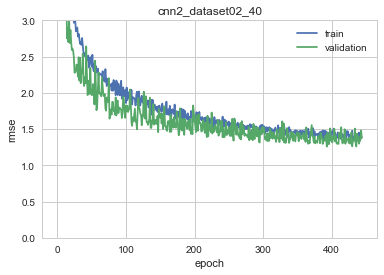

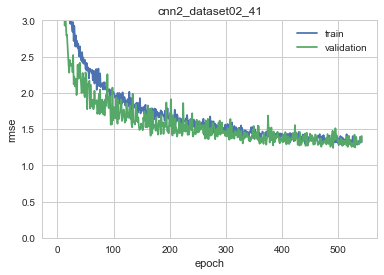

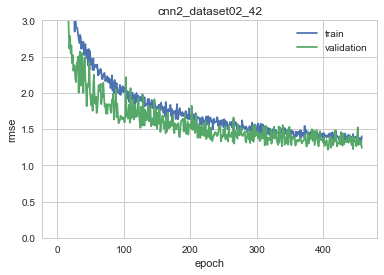

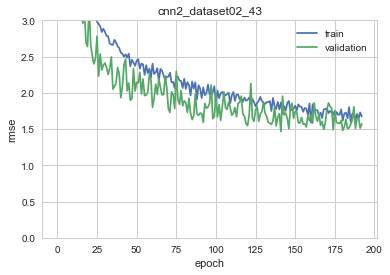

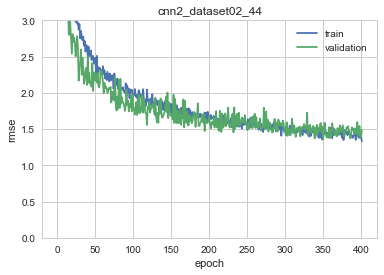

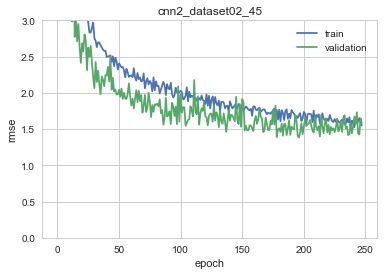

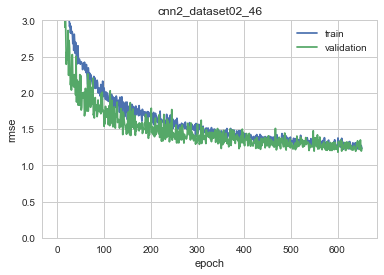

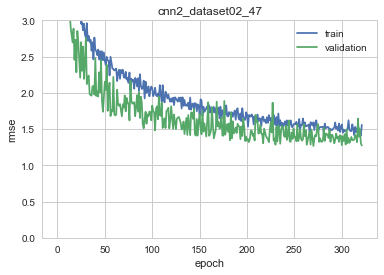

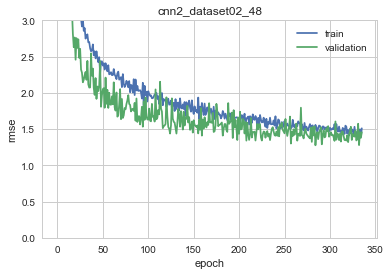

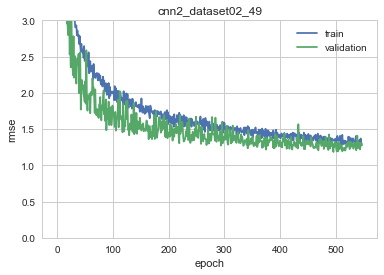

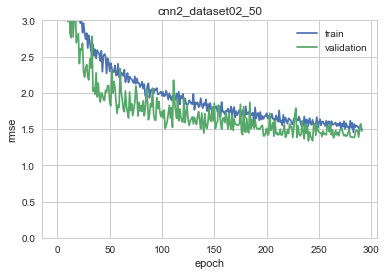

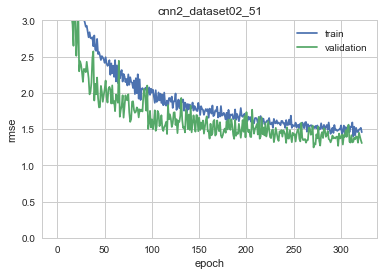

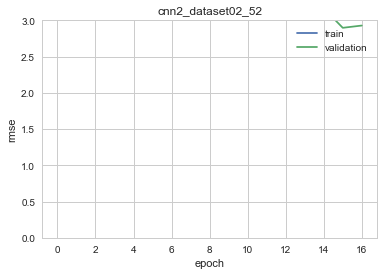

In [29]:
plot_loss_history(final_model_name, 'cnn2_dataset01', len(final_model[0]))
plot_loss_history(final_model_name, 'cnn2_dataset02', len(final_model[1]))

In [31]:
final_indexes08 = [7, 9, 15, 17, 22, 23, 27, 30, 40, 43, 55, 57] 
final_indexes22 = [0, 1, 2, 4, 8, 14, 17, 26, 27, 32, 34, 40, 41, 42, 46, 49]
final_selected_ensemble = pick_cnns(final_model, final_indexes08, final_indexes22)
predicted = predict(X_test, final_selected_ensemble)
predicted = np.clip(predicted, 0, 96)
submission = create_submission(predicted)
datetime = dt.datetime.now().strftime("%Y%m%d_%H%M")
filename = 'submission_' + datetime + '.csv'
submission.to_csv(filename, index_label='RowId')

# 6. Final Kaggle Submission
* score (RMSE): submission_20171122_0152.csv
  * public:  <strong>1.87261</strong>
  * private: <strong>1.64578</strong>
  
<img src="img/finalscore.png" />
<img src="img/private.png" />
<img src="img/public.png" />